In [2]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [ ]:
ROOT = '/content/drive"'

In [ ]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [ ]:
!git add .

In [ ]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [ ]:
!git commit -m "testing model with all the small changes to urdf and rewards"

[main e711dc6] testing model with all the small changes to urdf and rewards
 8 files changed, 502115 insertions(+), 1 deletion(-)
 rewrite colab.ipynb (94%)
 create mode 100644 data/episode_rewards/ppo_cum_rewards_v16.csv
 create mode 100644 data/timestep_rewards/ppo_rewards_v16.csv
 rewrite gym-seb/gym_seb/envs/__pycache__/seb_env.cpython-37.pyc (66%)
 create mode 100644 models/random_model_ppo_v16.zip
 create mode 100644 models/real_model_ppo_v16.zip


In [ ]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [4]:
!git pull origin

Already up to date.


Pushing updates to github

In [ ]:
!git push origin

Counting objects: 19, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (19/19), done.
Writing objects: 100% (19/19), 29.34 MiB | 2.59 MiB/s, done.
Total 19 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
remote: warning: See http://git.io/iEPt8g for more information.
remote: warning: File data/timestep_rewards/ppo_rewards_v16.csv is 64.85 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/ahhuang007/Sebastian.git
   27b4fd4..e711dc6  main -> main


Installing stable_baselines since it might be better

In [5]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 176 kB 5.6 MB/s 
     |████████████████████████████████| 2.8 MB 48.4 MB/s 
Reason for being yanked: re-release with new wheels
  Attempting uninstall: atari-py
    Found existing installation: atari-py 0.2.9
    Uninstalling atari-py-0.2.9:
      Successfully uninstalled atari-py-0.2.9


Installing my custom environment

In [5]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content/drive/MyDrive/Colab Notebooks/Sebastian


In [6]:
%cd gym-seb

/content/drive/MyDrive/Colab Notebooks/Sebastian/gym-seb


In [7]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/Sebastian/gym-seb
     |████████████████████████████████| 631 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 90.8 MB 255 bytes/s 
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708396 sha256=ba3a518ccf7946a444c665c9843ba3b4dd4d986d3acc807e99b45ef45a248436
  Stored in directory: /root/.cache/pip/wheels/7d/5e/87/7d50e0179edda70feff5bba05c381041e1c1fd80c6b06a4cc3
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
  Running setup.py develop for gym-seb
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.4.0 requires gym<0.20,>=0.1

Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)

In [4]:
from stable_baselines3.common.env_checker import check_env

check_env(env, warn=True)

resetting environment


AttributeError: ignored

In [4]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [5]:
'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
env.seed(4)
env.action_space.seed(4)
env.observation_space.seed(4)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
from stable_baselines3.common.callbacks import BaseCallback

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, li2, li3, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
    self.li2 = li2
    self.cum_reward = 0
    self.li3 = li3
  def _on_step(self) -> bool:
    self.li.append(self.locals['rewards'][0])
    self.li3[0].append(self.locals['infos'][0]['f_reward'])
    self.li3[1].append(self.locals['infos'][0]['d_reward'])
    self.li3[2].append(self.locals['infos'][0]['p_reward'])
    self.li3[3].append(self.locals['infos'][0]['y_reward'])
    self.li3[4].append(self.locals['infos'][0]['c_reward'])
    if self.locals['dones'][0] == False:
      self.cum_reward += self.locals['rewards'][0]
    else:
      self.li2.append(self.cum_reward)
      self.cum_reward = self.locals['rewards'][0]

In [7]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 214
(-0.014522931106496986, -0.08495088147583194, 0.03509967438191175)
resetting environment
robot has flipped over at timestep 509
(0.00595020669250385, 0.12369145064674675, 0.019542167921972865)
resetting environment
robot has flipped over at timestep 584
(0.02114411604442657, 0.04424230286150626, 0.033265079046833394)
resetting environment
robot has flipped over at timestep 704
(-0.08507632324400845, -0.017261855327388134, 0.025799185296203918)
resetting environment
robot has flipped over at timestep 851
(0.11144702230877303, -0.01860987202358335, 0.06840726698670535)
resetting environment
robot has flipped over at timestep 915
(-0.000741072363434135, -0.03952398532511446, 0.009822328080912782)
resetting environment
robot has flipped over at timestep 973
(0.00791036989353334, 0.005938189048827207, 0.023999768073639613)
resetting environment
robot has flipped over at timestep 1027
(-0.005853548940469538, -0.006942832667153306, 

In [8]:
model.save("models/random_model_ppo_v16")

In [ ]:
#In case I want to load a previously trained model for more training
ppo_model = PPO.load("real_model_ppo_action", env = env)
ppo_model.set_random_seed(4)

In [9]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [10]:
data = []
cum_data = []
rewards_data = [[],[],[],[],[]]
record = Recorder(data, cum_data, rewards_data, log_dir = "/")

In [15]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

ppo_model = ppo_model.learn(total_timesteps = 100000, log_interval = 10000, callback = record)
ppo_model.save("models/real_model_ppo_v17")

resetting environment
resetting environment
at episode 410000
(17.1874446835599, -2.407935781475804, 0.07433332729963658)
maximum timestep reached for episode
(24.13217258740591, -6.279791959230493, 0.0813800777366886)
resetting environment
robot has flipped over at timestep 415206
(5.4129185352032, -1.2001029175465847, 0.13552680055156197)
resetting environment
robot has flipped over at timestep 416294
(2.1133727448251576, -0.9776454659873799, 0.1357088112650775)
resetting environment
robot has flipped over at timestep 417647
(3.5132509365975926, -1.5730639666911748, 0.147187563370835)
resetting environment
at episode 420000
(4.4420976150977705, 2.9017165955603166, 0.07347415700400463)
robot has flipped over at timestep 421382
(7.967843929066369, 1.605707873447796, 0.15007712114907643)
resetting environment
robot has flipped over at timestep 423968
(5.8567233090796975, 2.063939388273803, 0.13338703417854997)
resetting environment
at episode 430000
(15.838736802041343, -2.0424173278971

In [16]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 510000
(33.06318939961993, -19.002447620974415, 0.04027844580153911)
maximum timestep reached for episode
(48.56699599605497, -29.023151971925703, 0.0493059929501024)
resetting environment
at episode 520000
(32.78845097465031, -18.67680027848653, 0.05282392076294578)
maximum timestep reached for episode
(48.07137589244773, -28.920346307985103, 0.055351361867832995)
resetting environment
at episode 530000
(32.39534012896405, -20.532072040446423, 0.04972180923285853)
maximum timestep reached for episode
(47.55279933369197, -30.541250214160435, 0.05389187298595928)
resetting environment
at episode 540000
(32.4791805865048, -20.83793912913215, 0.04338048160837851)
maximum timestep reached for episode
(47.74590105520326, -30.862219159304402, 0.04913126134151227)
resetting environment
at episode 550000
(32.73256555756431, -20.21575422226693, 0.041161226176051474)
maximum timestep reached for episode
(48.098777834751765, -30.565496373297478, 0.0538531009558248

Plotting

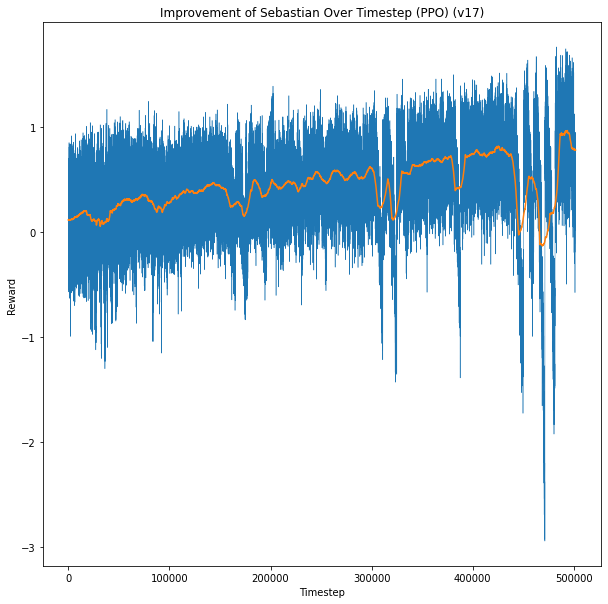

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

%matplotlib inline
N = 10000
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(data) + 1)
plt.plot(xs, data, linewidth = 0.5)
y = uniform_filter1d(data, size=N)
plt.plot(xs, y)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.title("Improvement of Sebastian Over Timestep (PPO) (v17)")
plt.show()

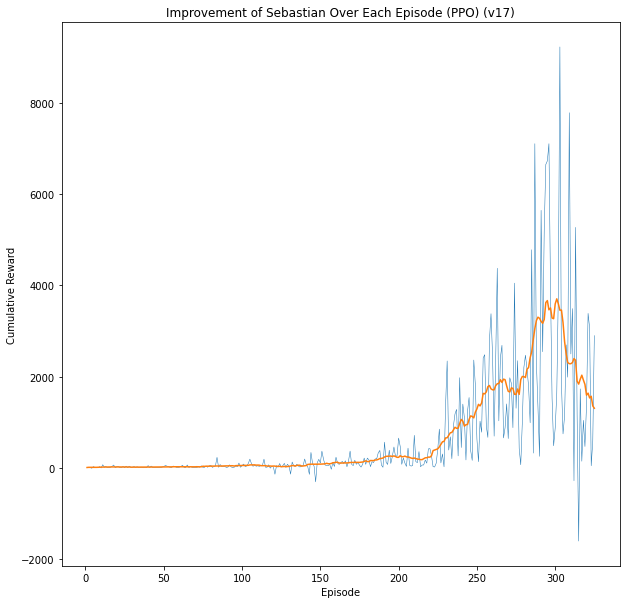

In [18]:
N = 20
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(cum_data) + 1)
plt.plot(xs, cum_data, linewidth = 0.5)
y = uniform_filter1d(cum_data, size=N)
plt.plot(xs, y)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Improvement of Sebastian Over Each Episode (PPO) (v17)")
plt.show()

So, yeah, my algorithm's improving but it still needs to improve a lot more. It would appear that PPO is better than DDPG, so I think I'll be working with PPO from here on out.

In [ ]:
#Testing TD3
from stable_baselines3 import TD3
td3_model = TD3('MlpPolicy', env, verbose = 1)
td3_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Possible methods of improvement: Expanding observation space to include joint angles/velocities (done), contact forces, rotation matrix, increase reward based on velocity and magnitude of action taken

Some testing we did on TD3 (an upgraded version of DDPG), it takes so long to train that it doesn't seem worth looking into.

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(td3_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 1114318
resetting environment
at episode 1120000
-1.541983962059021
maximum timestep reached for episode
resetting environment
at episode 1130000
-1.4691083431243896
maximum timestep reached for episode
resetting environment
at episode 1140000
-2.7713000774383545
maximum timestep reached for episode
resetting environment
at episode 1150000
-1.830146312713623
maximum timestep reached for episode
resetting environment
at episode 1160000
-1.852158546447754
maximum timestep reached for episode
resetting environment
at episode 1170000
-0.8908807039260864
maximum timestep reached for episode
resetting environment
robot has flipped over at timestep 1174587
resetting environment
robot has flipped over at timestep 1176486
resetting environment
robot has flipped over at timestep 1176766
resetting environment
mean_reward=-11838.14 +/- 8694.458009957501


In [ ]:
td3_model.save("random_model_td3")

In [ ]:
td3_model = TD3.load("real_model_td3", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
class TD3Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(TD3Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['episode_reward'])


In [ ]:
data2 = []
record = TD3Recorder(data2, log_dir = "/")

In [ ]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#Setting for loop so we can train in pieces in case colab kicks us off

td3_model = td3_model.learn(total_timesteps = 100000, log_interval = 100, callback = record)
td3_model.save("real_model_td3")

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ddpg_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [19]:
import pandas as pd
df = pd.DataFrame(data = {"timestep":range(1,len(data) + 1), "reward":data, "f_reward":rewards_data[0], 
                          "d_reward":rewards_data[1], "p_reward":rewards_data[2], 
                          "y_reward":rewards_data[3], "c_reward":rewards_data[4]})
df2 = pd.DataFrame(data = {"episode":range(1, len(cum_data) + 1), "cumulative reward": cum_data})

In [20]:
df.to_csv("./data/timestep_rewards/ppo_rewards_v17.csv")
df2.to_csv("./data/episode_rewards/ppo_cum_rewards_v17.csv")